# Customer Churn Prediction | K17_Hoang Tram Anh

# 1. Preprocessing

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it



In [18]:
F = r'H:\My Drive\01. DATA ANALYSIS LEARNING MATERIALS\01. Unigap_DA Course\05. ML & Statistics\04. ML_Final project\churn_prediction.xlsx'

In [19]:
df = pd.read_excel(F)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [20]:
# Features types
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [21]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 15
Numerical feature are:
 {'SatisfactionScore', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'WarehouseToHome', 'Complain', 'Churn', 'Tenure', 'CashbackAmount', 'CouponUsed', 'CustomerID', 'OrderAmountHikeFromlastYear', 'CityTier', 'NumberOfAddress', 'OrderCount'}


In [22]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 5
Categorical feature are:
 {'PreferedOrderCat', 'PreferredLoginDevice', 'MaritalStatus', 'Gender', 'PreferredPaymentMode'}


# 2. Feature Engineer and EDA

## Check imbalance ratio

In [23]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# Calculate the imbalance ratio
imbalance_ratio = churn_counts[1] / churn_counts[0]
print("Imbalance Ratio: {:.2f}".format(imbalance_ratio))

0    4682
1     948
Name: Churn, dtype: int64
Imbalance Ratio: 0.20


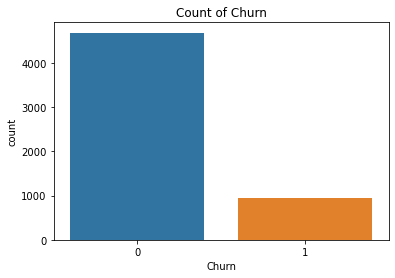

In [24]:
# plotting with target feature
sns.countplot(data=df, x='Churn')
plt.title('Count of Churn')
plt.show()

In [25]:
print("Overall Churn Rate: {:.2%}".format(df['Churn'].mean()))

Overall Churn Rate: 16.84%


#### Ploting histogram probability distribution and box plot to find if numerical value are in normally distribution and our dataset has outliners

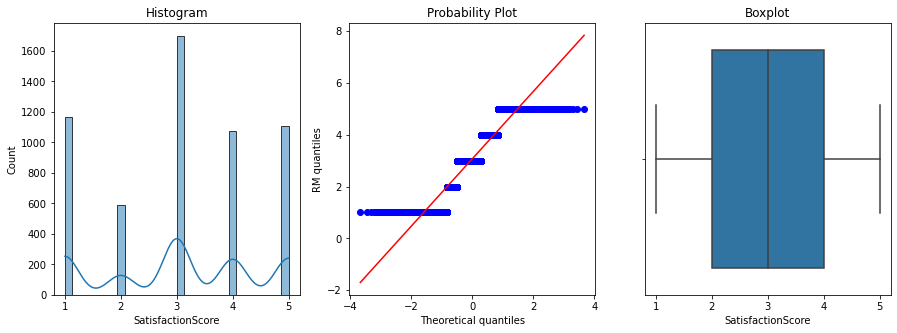

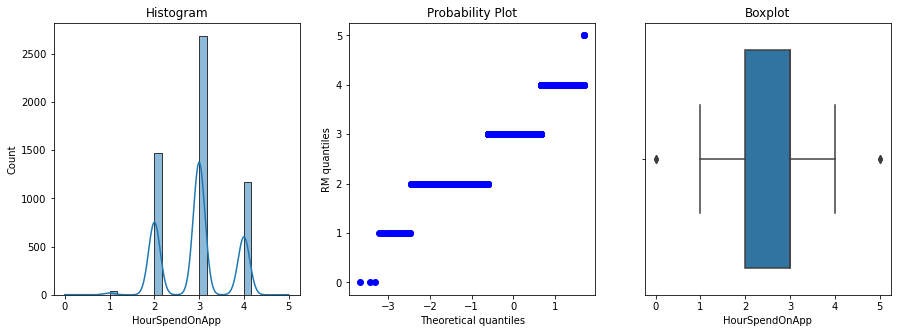

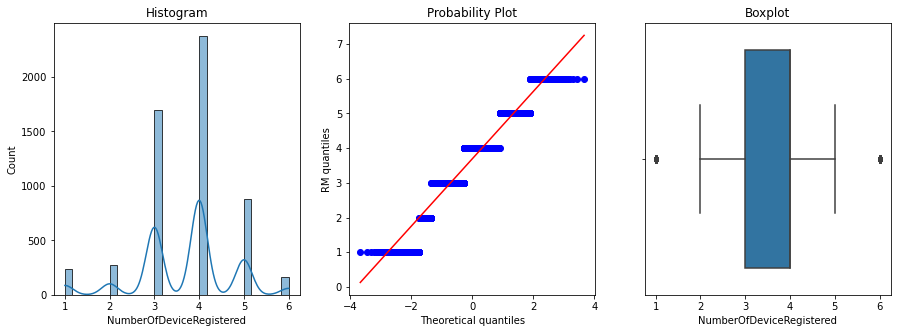

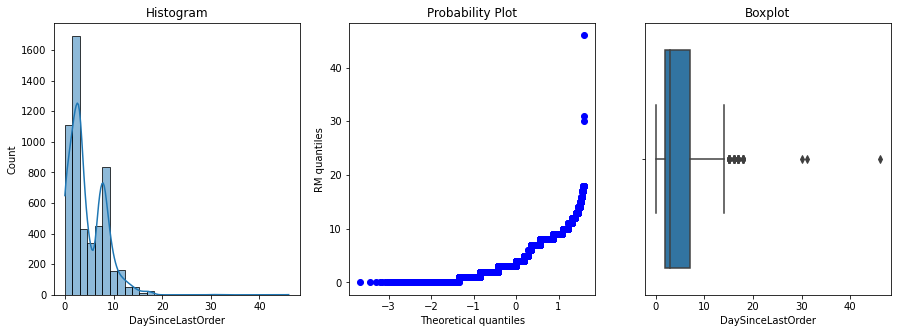

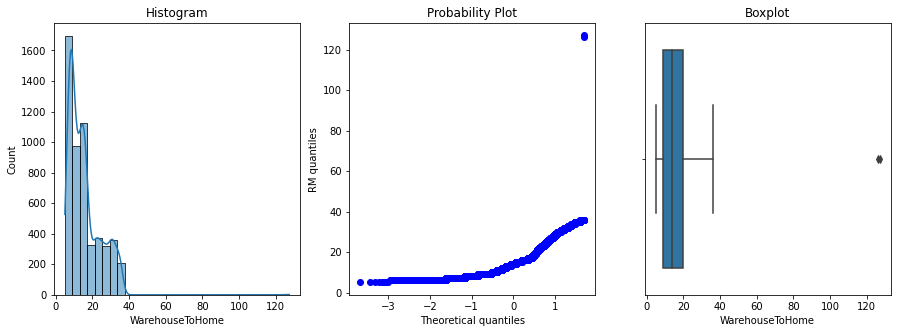

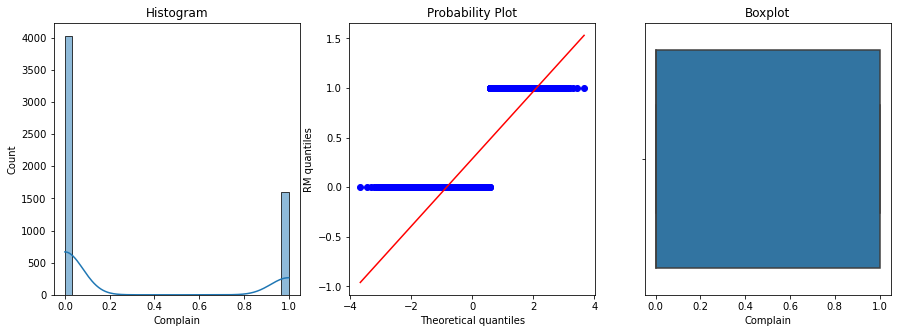

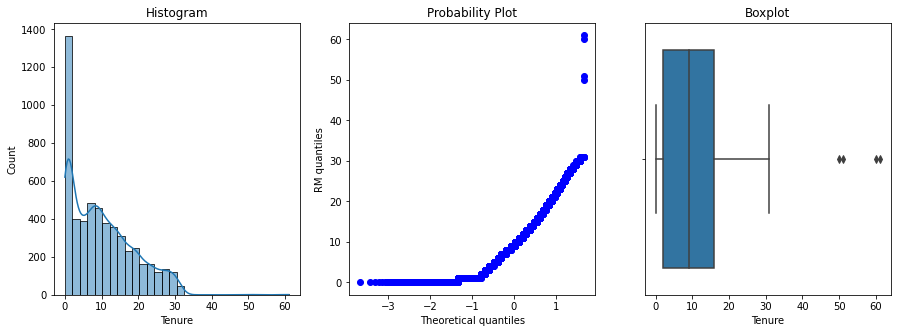

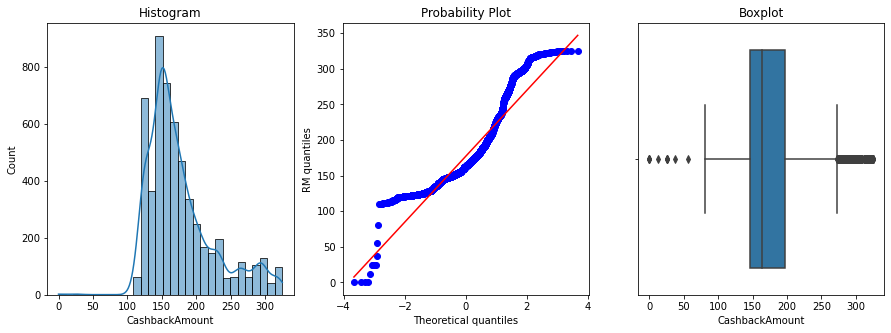

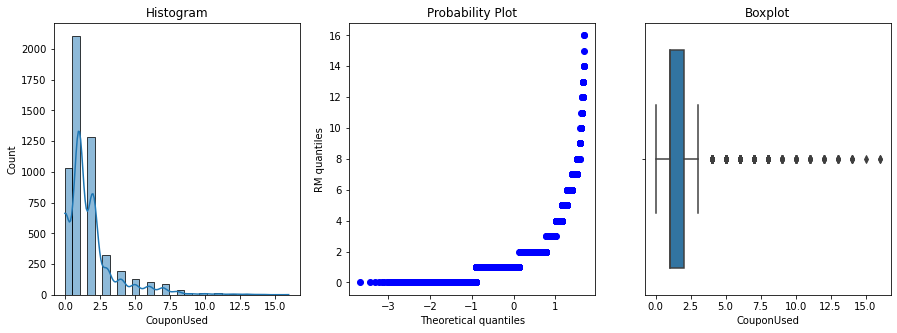

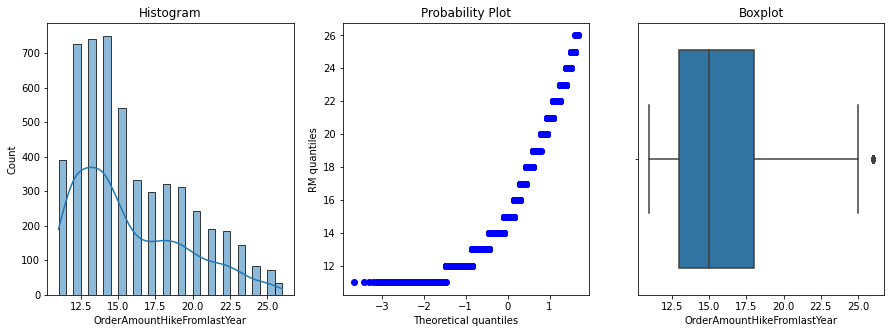

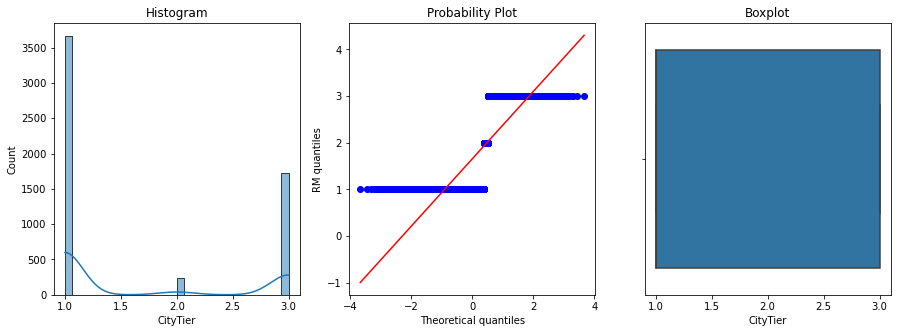

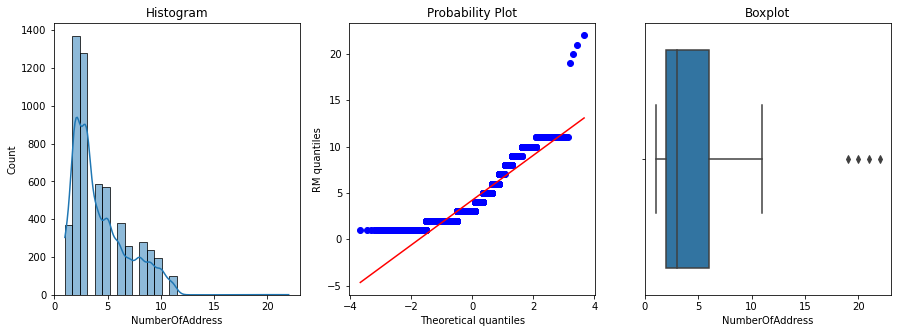

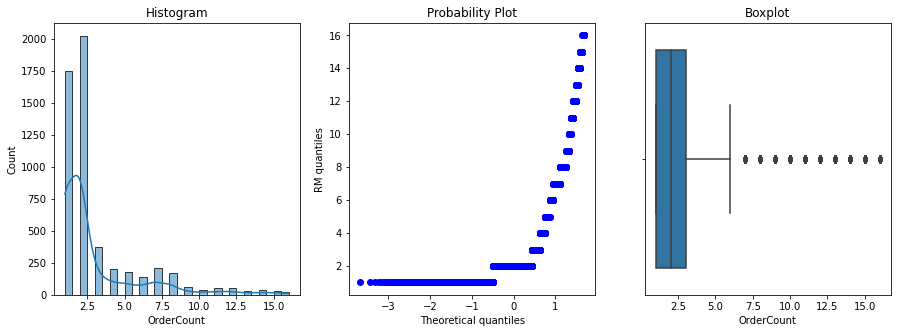

In [26]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature not in ['CustomerID', 'Churn']:
        plt.figure(figsize=(15,5))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
    
plt.show()

## Handling missing/duplicated values:

In [27]:
# Check the entries for each column
for col in df.columns: 
    print('{} : {}'.format(col, df[col].unique()))

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
Churn : [1 0]
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
CityTier : [3 1 2]
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender : ['Female' 'Male']
HourSpendOnApp : [ 3.  2. nan  1.  0.  4.  5.]
NumberOfDeviceRegistered : [3 4 5 2 1 6]
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
SatisfactionScore : [2 3 5 4 1]
MaritalStatus : ['Single' 'Divorced' 'Married']
NumberOfAddress : [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain : [1 0]
OrderAmountHikeFromlastY

In [28]:
df['Tenure'] = df['Tenure'].fillna(0)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Cash on Delivery': 'COD', 'CC': 'Credit Card'})
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount'] = df['OrderCount'].fillna(0)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())
df


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [29]:
# Double Check the entries for each column
for col in df.columns: 
    print('{} : {}'.format(col, df[col].unique()))

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
Churn : [1 0]
Tenure : [ 4.  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
PreferredLoginDevice : ['Mobile Phone' 'Computer']
CityTier : [3 1 2]
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
PreferredPaymentMode : ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender : ['Female' 'Male']
HourSpendOnApp : [3. 2. 1. 0. 4. 5.]
NumberOfDeviceRegistered : [3 4 5 2 1 6]
PreferedOrderCat : ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
SatisfactionScore : [2 3 5 4 1]
MaritalStatus : ['Single' 'Divorced' 'Married']
NumberOfAddress : [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain : [1 0]
OrderAmountHikeFromlastYear : [11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21

In [30]:
df['CouponPerOrder'] = df.loc[df['OrderCount'] > 0, 'CouponUsed'] / df.loc[df['OrderCount'] > 0, 'OrderCount']
df['CashbackPerOrder'] = df.loc[df['OrderCount'] > 0, 'CashbackAmount']/ df.loc[df['OrderCount'] > 0, 'OrderCount']
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CouponPerOrder,CashbackPerOrder
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1.0,159.930
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,0.0,120.900
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,0.0,120.280
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,134.070
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1.0,129.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,Married,6,0,18.0,1.0,2.0,4.0,150.71,0.5,75.355
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,Married,6,0,16.0,1.0,2.0,3.0,224.91,0.5,112.455
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,Married,3,1,21.0,1.0,2.0,4.0,186.42,0.5,93.210
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,Married,4,0,15.0,2.0,2.0,9.0,178.90,1.0,89.450


In [31]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CouponPerOrder,CashbackPerOrder
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1.0,159.93
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,0.0,120.90
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,0.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1.0,129.60


In [32]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder                0
CashbackAmount                   0
CouponPerOrder                 258
CashbackPerOrder               258
dtype: int64

In [33]:
df['CouponPerOrder']=df['CouponPerOrder'].fillna(0)
df['CashbackPerOrder']=df['CashbackPerOrder'].fillna(0)
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CouponPerOrder,CashbackPerOrder
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1.0,159.930
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,0.0,120.900
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,0.0,120.280
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,0.0,134.070
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1.0,129.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,Married,6,0,18.0,1.0,2.0,4.0,150.71,0.5,75.355
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,Married,6,0,16.0,1.0,2.0,3.0,224.91,0.5,112.455
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,Married,3,1,21.0,1.0,2.0,4.0,186.42,0.5,93.210
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,Married,4,0,15.0,2.0,2.0,9.0,178.90,1.0,89.450


### Analyzing the correlation matrix, it is observed that users are more likely to churn if they made a complaint in the past and stay if their tenures are mature and enjoyed the promotion on platform. This suggests that new buyers are more vulnerable and prone to churning compared to those who have been with us for a longer time.


In [34]:
tenure_groups = ['0-3 months', '3-6 months', '6-12 months', '+12 months']
satisfaction_groups = ['No Score','Detractor', 'Neutral', 'Promoter']
delivery_distance_group = ['0-10km', '10-20km', '+20 km']
frequency_group = ['0-1hr', '1-2hrs', '2-3hrs', '+3hrs']
recency_group = ['0-2D', '2-3D', '3-5D', '5-7D', '7-15D', '15-30D', '+30D']
cashback_group =['$0-15','$15-30','$30-50','$50-80','+$80']

df['TenureGroup'] = pd.cut(df['Tenure'], bins=[-1, 3, 6, 12, float('inf')], labels=tenure_groups).astype('object')
df['ScoreSentiment'] = pd.cut(df['SatisfactionScore'], bins=[-1,2, 3, 4, float('inf')], labels=satisfaction_groups).astype('object')
df['DeliveryDistanceGroup'] = pd.cut(df['WarehouseToHome'], bins=[-1, 10, 20, float('inf')], labels=delivery_distance_group).astype('object')
df['FrequencyGroup'] = pd.cut(df['HourSpendOnApp'], bins=[-1, 1, 2, 3, float('inf')], labels=frequency_group).astype('object')
df['RecencyGroup'] = pd.cut(df['DaySinceLastOrder'], bins=[-1, 2, 3, 5, 7, 15, 30, float('inf')], labels=recency_group).astype('object')
df['CashbackPerOrderGroup'] = pd.cut(df['CashbackPerOrder'],bins=[-1,15,30,50,80,float('inf')],labels=cashback_group).astype('object')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,DaySinceLastOrder,CashbackAmount,CouponPerOrder,CashbackPerOrder,TenureGroup,ScoreSentiment,DeliveryDistanceGroup,FrequencyGroup,RecencyGroup,CashbackPerOrderGroup
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,5.0,159.93,1.0,159.930,3-6 months,No Score,0-10km,2-3hrs,3-5D,+$80
1,50002,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,0.0,120.90,0.0,120.900,0-3 months,Detractor,0-10km,2-3hrs,0-2D,+$80
2,50003,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,3.0,120.28,0.0,120.280,0-3 months,Detractor,+20 km,1-2hrs,2-3D,+$80
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,3.0,134.07,0.0,134.070,0-3 months,Promoter,10-20km,1-2hrs,2-3D,+$80
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,3.0,129.60,1.0,129.600,0-3 months,Promoter,10-20km,2-3hrs,2-3D,+$80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,4.0,150.71,0.5,75.355,6-12 months,No Score,+20 km,2-3hrs,3-5D,$50-80
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,3.0,224.91,0.5,112.455,+12 months,Promoter,10-20km,2-3hrs,2-3D,+$80
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4.0,186.42,0.5,93.210,0-3 months,Neutral,10-20km,2-3hrs,3-5D,+$80
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,9.0,178.90,1.0,89.450,+12 months,Neutral,0-10km,+3hrs,7-15D,+$80


In [35]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
CouponPerOrder                 float64
CashbackPerOrder               float64
TenureGroup                     object
ScoreSentiment                  object
DeliveryDistanceGroup           object
FrequencyGroup           

In [36]:
# New categorical feature
new_categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(new_categorical_feature)}')
print(f'Categorical feature are:\n {new_categorical_feature}')

Count of Categorical feature: 11
Categorical feature are:
 {'TenureGroup', 'PreferedOrderCat', 'CashbackPerOrderGroup', 'ScoreSentiment', 'PreferredLoginDevice', 'MaritalStatus', 'FrequencyGroup', 'DeliveryDistanceGroup', 'Gender', 'RecencyGroup', 'PreferredPaymentMode'}


<AxesSubplot:>

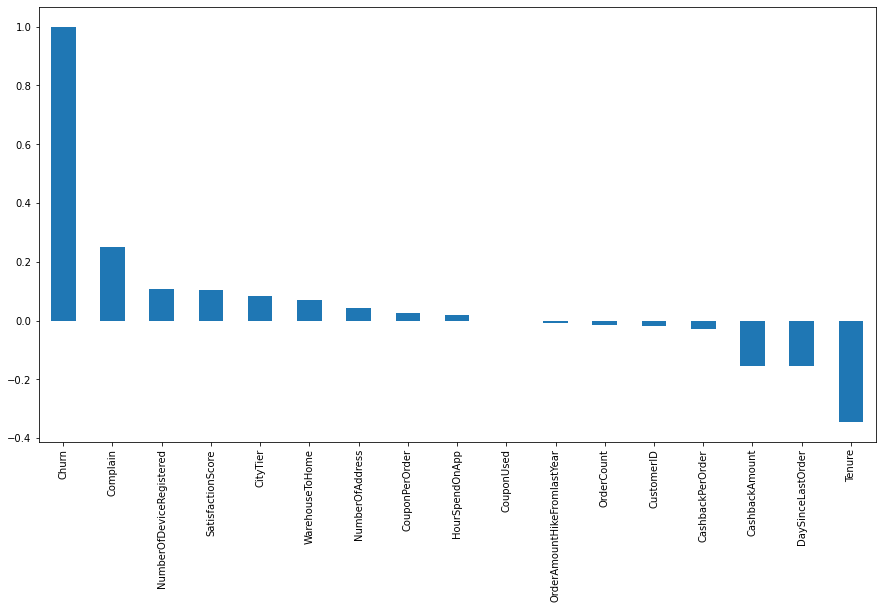

In [37]:
#Get Correlation of Churn with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

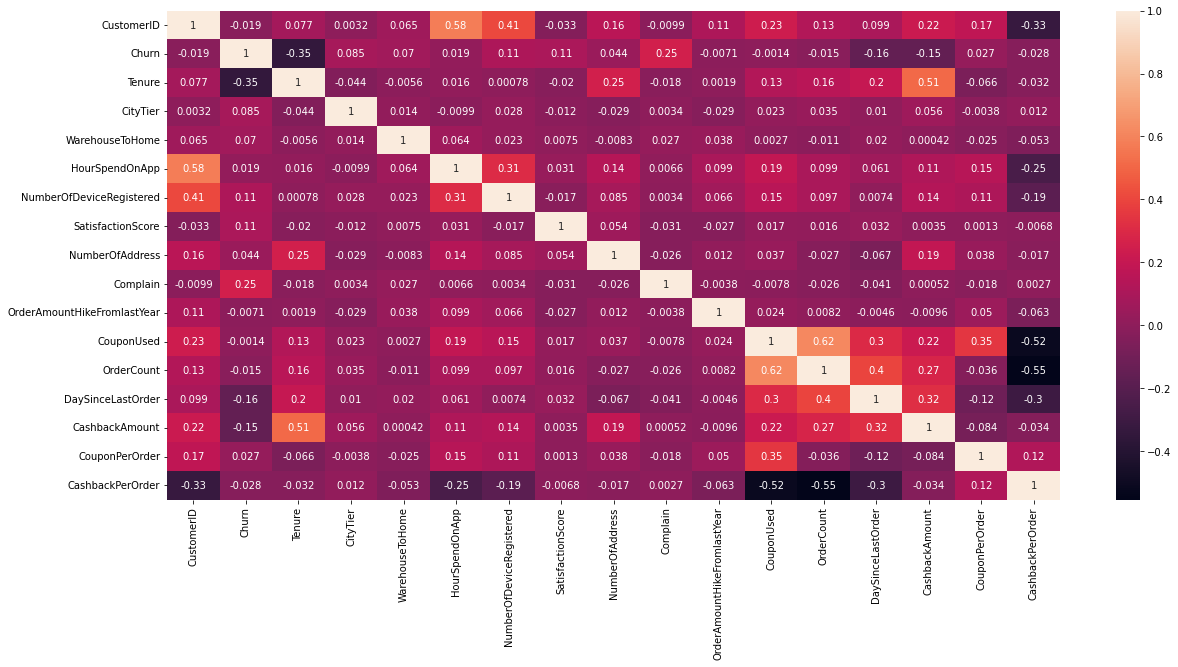

In [38]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)

## What are the patterns/behavior of churned users?
### 1. In term of demographic of churn users, they are more likely to be single, male gender, living in high city tier 3 and 2 with far distance from warehouse, prefer COD payment method

a. Marital Status: Percentage of a single person proning to churn is double fold than the one who got married (26.7% and 11.5% respectively)

b. Gender: The churn rate for males is higher (17.73%) compared to females (15.49%)

b. Tenure Group: The highest churn rate is observed in the "0-3 months" tenure group (40.24%). As the tenure increases, the churn rate decreases. 

c. Preferred Payment Mode: Customers who prefer COD (Cash on Delivery) have the highest churn rate (24.90%), followed by E-wallet (22.80%) and Debit Card (15.38%)

d. Delivery Distance Group: Customers with a delivery distance of over 20 km have the highest churn rate (20.40%), followed by 10-20 km (17.60%) and 0-10 km (13.51%). This suggests that customers located farther from the warehouse are more likely to experience some bad experience of delivery 






### 2. In term of purchasing behavior, it's surprised that who spent more hours to engage with platform (from 2-3 hours) are more likely to churn. While the churn rate was highest in group of users who didn't make any recent purchase in L30D, it's quite alarming that a considerable share of churn users were from people who just made a purchase last 3 days.
a. Frequency Group: Customers who spend 2-3 hours on the app have the highest churn rate (17.61%), followed by +3 hours (16.79%) and 1-2 hours (15.77%)

b. Recency Group: Customers who made a purchase more than 30 days ago have the highest churn rate (50%), followed by 0-2 days (24.92%) and 5-7 days (14.46%)

c. Cashback Per Order Group: Customers who receive cashback of over 80USD have the highest churn rate (25.25%), followed by 0-15USD (21.05%) and 30-50USD (14.35%). This can be harmful to PnL and platform health due to high acquisition cost.

d. CategoryPrefer: Customers who purchased Mobile Phone got the highest churn rate (27.4%), followed by Fashion (15.5%). They might had a bad experience with product quality compared to other products.


## 3. Regarding to aftersale service, customer complaints are a significant factor contributing to churn rate 

a. Complain: Customers who have lodged a complaint have a significantly higher churn rate (31.67%) compared to those who haven't (10.93%) 

b. Satisfaction Score Sentiment: Customers who are Promoters have the highest churn rate (23.83%) compared to Detractors (17.20%) and Neutrals (17.13%). This indicates that customers with a positive sentiment may still churn.



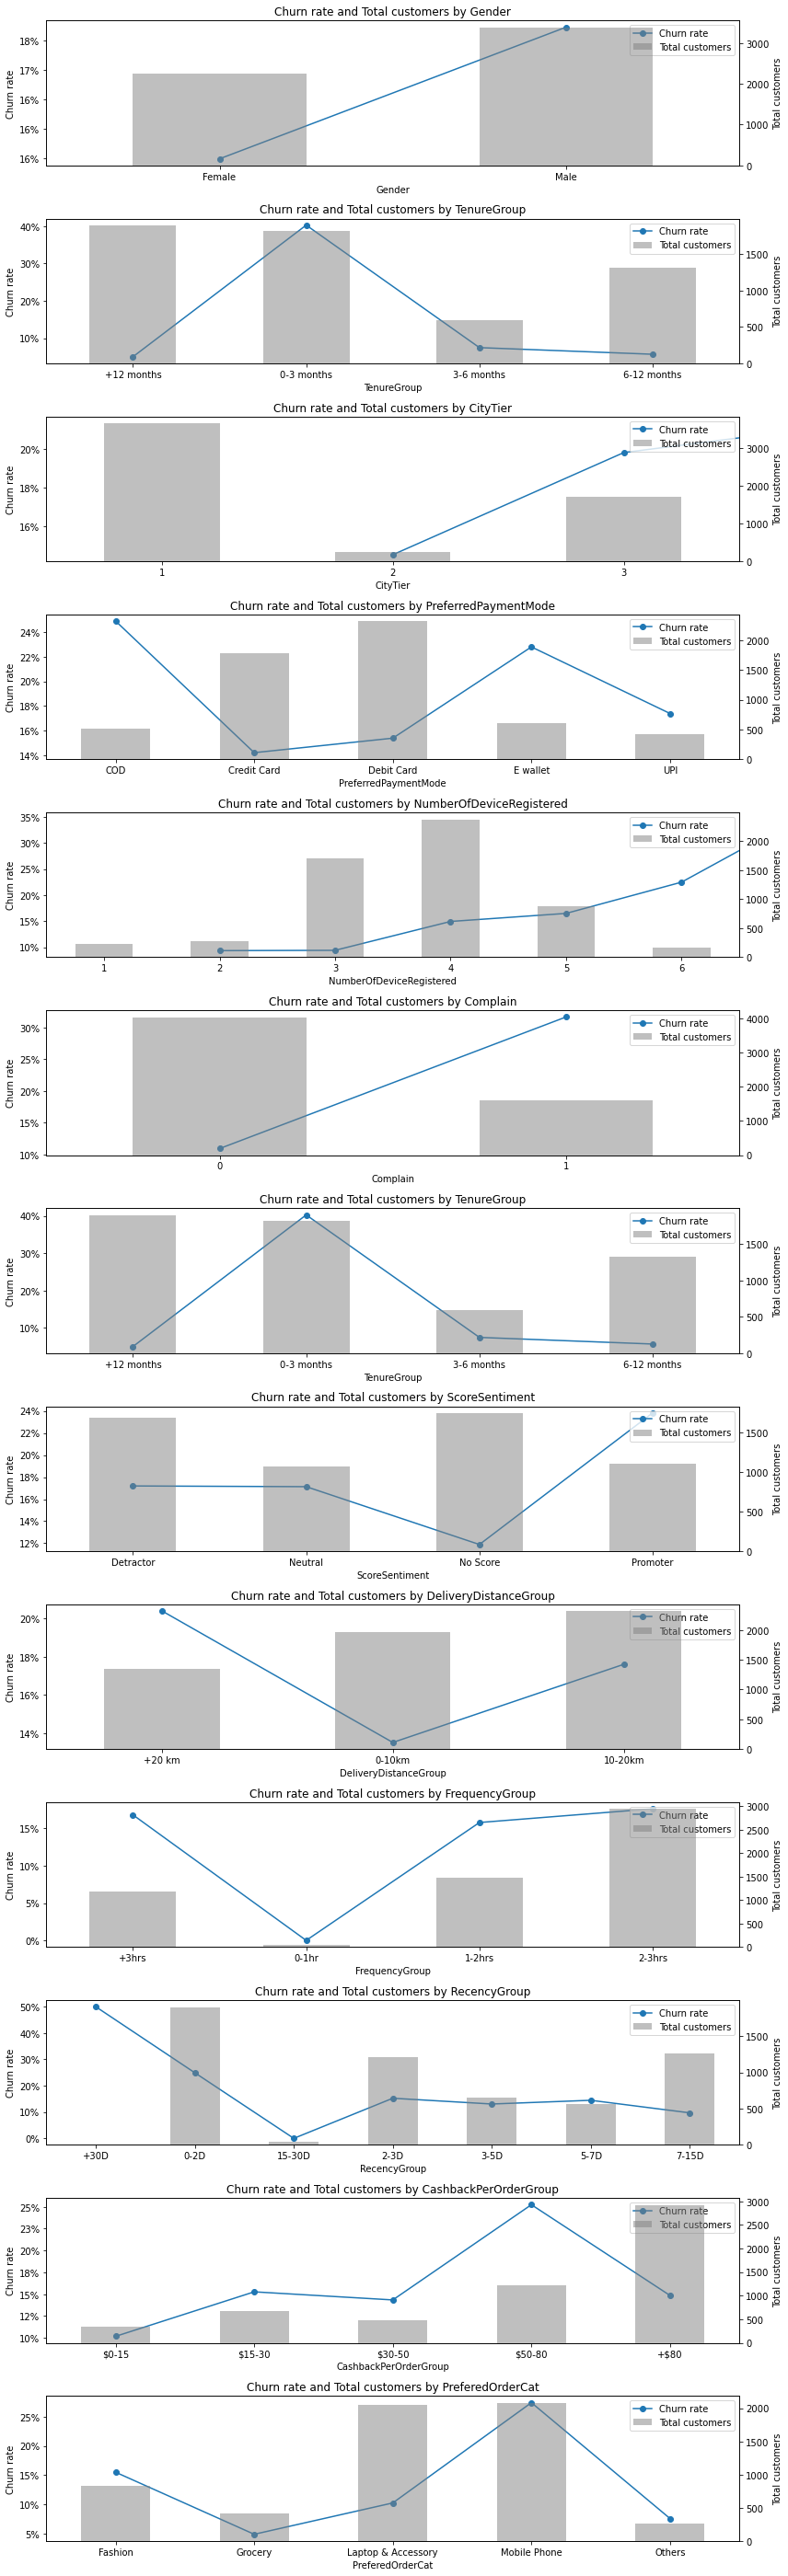

In [39]:
colnames = ['Gender', 'TenureGroup', 'CityTier', 'PreferredPaymentMode','NumberOfDeviceRegistered','Complain','TenureGroup','ScoreSentiment','DeliveryDistanceGroup','FrequencyGroup','RecencyGroup','CashbackPerOrderGroup','PreferedOrderCat']

fig, axes = plt.subplots(len(colnames), 1, figsize=(12, 3 * len(colnames)))

for i, col in enumerate(colnames):
    ax = axes[i]
    ax2 = ax.twinx()  

    churn_rates = df.groupby(col)['Churn'].mean().sort_index()
    churn_rates.plot(kind='line', ax=ax, marker='o', label='Churn rate')
    
  
    ax.set_ylabel('Churn rate')
    ax.yaxis.set_major_formatter('{:.0%}'.format)
    
  
    total_customers = df[col].value_counts().sort_index()
    total_customers.plot(kind='bar', ax=ax2, alpha=0.5, color='gray', label='Total customers')
    
    
    ax2.set_ylabel('Total customers')    
    ax.set_title('Churn rate and Total customers by %s' % col)
         
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    handles = lines + lines2
    labels = labels + labels2
    
    legend_order = sorted(zip(labels, handles), key=lambda x: x[0])
    labels, handles = zip(*legend_order)
    
    ax.legend(handles, labels, loc='upper right')
 
plt.tight_layout()
plt.show()

### Across all tenure groups, only about 25% user only apply from 0.6 to 1 coupon per order. Immature buyers also showed a lower median of coupon usage which suggest that they're not sensitive to promotion or they're not familiar with how to collect coupon for usuage.

<Figure size 432x360 with 0 Axes>

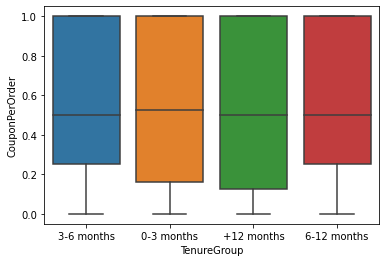

<Figure size 432x360 with 0 Axes>

In [40]:
sns.boxplot(data=df, x='TenureGroup',y='CouponPerOrder')
plt.figure(figsize=(6, 5))

### Regarding to cashback, it does make sense that the older users are, the more CashbackAmount they accumulated by the time. However there still have some users who are outliners belonging to group of immature users who got a extremely high cashback amount, that require a deepdive for fraud prevention

<Figure size 432x360 with 0 Axes>

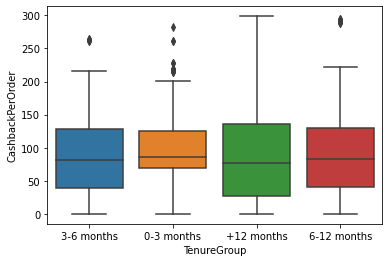

<Figure size 432x360 with 0 Axes>

In [41]:
sns.boxplot(data=df, x='TenureGroup',y='CashbackPerOrder')
plt.figure(figsize=(6, 5))

## What are your suggestions to the company to reduce churned users

### 1. Improve Onboarding Experience: Since new customers have a higher churn rate, focus on providing a seamless onboarding experience. Offer personalized onboarding assistance, clear instructions, and tutorials to help customers get started with the platform or service.

### 2. Enhance Customer Support: Addressing customer complaints is crucial for reducing churn. Invest in improving customer support channels and response times. 

### 3. Offer Incentives and Discounts: Consider offering incentives, such as discounts, cashback, or loyalty programs, to encourage customers to stay engaged and loyal. Rewarding customer loyalty can help build long-term relationships and reduce churn

### 4. Enhance Payment Options: Improve the payment experience by expanding the share of non-COD payments available by using payment voucher for non-COD method 


### 5. Improve Delivery and Product Quality Experience: Customers located farther from the warehouse have a higher churn rate. Focus on optimizing the delivery process, including faster delivery times, along with strictly tighten the quality of product of Mobilephone and Fashion or punish the low quality sellers to enhance the overall customer experience, 




# 3. Data Transforming/Model Training

## Encoding

In [42]:
print(new_categorical_feature)

{'TenureGroup', 'PreferedOrderCat', 'CashbackPerOrderGroup', 'ScoreSentiment', 'PreferredLoginDevice', 'MaritalStatus', 'FrequencyGroup', 'DeliveryDistanceGroup', 'Gender', 'RecencyGroup', 'PreferredPaymentMode'}


In [43]:
encoder = LabelEncoder()
for feature in new_categorical_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [44]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,DaySinceLastOrder,CashbackAmount,CouponPerOrder,CashbackPerOrder,TenureGroup,ScoreSentiment,DeliveryDistanceGroup,FrequencyGroup,RecencyGroup,CashbackPerOrderGroup
0,50001,1,4.0,1,3,6.0,2,0,3.0,3,...,5.0,159.93,1.0,159.93,2,2,1,3,4,4
1,50002,1,0.0,1,1,8.0,4,1,3.0,4,...,0.0,120.90,0.0,120.90,1,0,1,3,1,4
2,50003,1,0.0,1,1,30.0,2,1,2.0,4,...,3.0,120.28,0.0,120.28,1,0,0,2,3,4
3,50004,1,0.0,1,3,15.0,2,1,2.0,4,...,3.0,134.07,0.0,134.07,1,3,2,2,3,4
4,50005,1,0.0,1,1,12.0,1,1,3.0,3,...,3.0,129.60,1.0,129.60,1,3,2,3,3,4


## Select Feature

In [45]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p_values = {}
        self.chi2_values = {}
        self.dofs = {}
        
    def _print_chisquare_result(self, colX, alpha):
        if self.p_values[colX] < alpha:
            print(f"{colX} is IMPORTANT for Prediction")
        else:
            print(f"{colX} is NOT an important predictor. (Discard {colX} from model)")
        
    def TestIndependence(self, colX, colY, alpha=0.05):
        observed = pd.crosstab(self.df[colY], self.df[colX])
        chi2, p, dof, expected = chi2_contingency(observed.values)
        self.p_values[colX] = p
        self.chi2_values[colX] = chi2
        self.dofs[colX] = dof
        
        self._print_chisquare_result(colX, alpha)

# Initialize ChiSquare Class
cT = ChiSquare(df)

# Feature Selection
selected_features = []
for var in new_categorical_feature:
    cT.TestIndependence(colX=var, colY="Churn")
    if cT.p_values[var] < 0.05:
        selected_features.append(var)

# Print the selected features
print("Selected Features:")
print(selected_features)

# Splitting dataset into dependent and independent features
X = df.drop(columns='Churn')
y = df['Churn']

TenureGroup is IMPORTANT for Prediction
PreferedOrderCat is IMPORTANT for Prediction
CashbackPerOrderGroup is IMPORTANT for Prediction
ScoreSentiment is IMPORTANT for Prediction
PreferredLoginDevice is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
FrequencyGroup is IMPORTANT for Prediction
DeliveryDistanceGroup is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
RecencyGroup is IMPORTANT for Prediction
PreferredPaymentMode is IMPORTANT for Prediction
Selected Features:
['TenureGroup', 'PreferedOrderCat', 'CashbackPerOrderGroup', 'ScoreSentiment', 'PreferredLoginDevice', 'MaritalStatus', 'FrequencyGroup', 'DeliveryDistanceGroup', 'Gender', 'RecencyGroup', 'PreferredPaymentMode']


## Apply to ML algorithm:

In [46]:
# Apply feature selection
selection = SelectKBest(score_func=chi2, k=10)
X_selected = selection.fit_transform(X, y)
selected_features = [feature for feature, support in zip(X.columns, selection.get_support()) if support]

In [47]:
# Select top 10 features
selection = SelectKBest(score_func=chi2, k=10) 

In [48]:
# Apply feature selection
X_selected = selection.fit_transform(X, y)
selected_features = [feature for feature, 
                     support in zip(X.columns, selection.get_support()) if support]

In [49]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8516873889875666
Confusion matrix :
 [[908 128]
 [ 39  51]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1036
           1       0.28      0.57      0.38        90

    accuracy                           0.85      1126
   macro avg       0.62      0.72      0.65      1126
weighted avg       0.90      0.85      0.87      1126



# 4. Model Evaluation

### The model performs relatively well in correctly predicting non-churned customers --> the model has low precision and F1-score for the churned customers, indicating a relatively high number of false positives and a need for further improvement in predicting churn accurately

## 5. Model Improvement

### Use RFE with the logistic regression model

In [51]:
# Splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
log_reg = LogisticRegression()

# Initialize RFE with the logistic regression model
rfe = RFE(estimator=log_reg)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the logistic regression model on the selected features
log_reg.fit(X_train_selected, y_train)

# Predict using the logistic regression model with selected features
log_pred = log_reg.predict(X_test_selected)

# Evaluate the model with selected features
accuracy = accuracy_score(log_pred, y_test)
print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8845470692717584
Confusion matrix :
 [[900  89]
 [ 41  96]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       989
           1       0.52      0.70      0.60       137

    accuracy                           0.88      1126
   macro avg       0.74      0.81      0.76      1126
weighted avg       0.90      0.88      0.89      1126



### Accuracy for detecting negative is still not good enough, so we use SMOTEENN to oversampling

In [52]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 3741, 1: 763})
The number of classes after fit Counter({1: 2910, 0: 1941})


In [53]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [54]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.870236869207003
Confusion matrix :
 [[342  83]
 [ 43 503]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       425
           1       0.86      0.92      0.89       546

    accuracy                           0.87       971
   macro avg       0.87      0.86      0.87       971
weighted avg       0.87      0.87      0.87       971



In [55]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9073120494335737
Confusion matrix :
 [[338  43]
 [ 47 543]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       381
           1       0.93      0.92      0.92       590

    accuracy                           0.91       971
   macro avg       0.90      0.90      0.90       971
weighted avg       0.91      0.91      0.91       971



In [56]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.8228630278063852
Confusion matrix :
 [[291  78]
 [ 94 508]]
Classification report :
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       369
           1       0.87      0.84      0.86       602

    accuracy                           0.82       971
   macro avg       0.81      0.82      0.81       971
weighted avg       0.82      0.82      0.82       971



In [57]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.94129763130793
Confusion matrix :
 [[357  29]
 [ 28 557]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       386
           1       0.95      0.95      0.95       585

    accuracy                           0.94       971
   macro avg       0.94      0.94      0.94       971
weighted avg       0.94      0.94      0.94       971



### After using SMOOTEENN, we got better accuraccy. TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter tunning for this model only

In [58]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [59]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=17, max_leaf_nodes=18, min_samples_leaf=11, min_samples_split=9, n_estimators=250;, score=0.959 total time=   7.1s
[CV 2/5] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=17, max_leaf_nodes=18, min_samples_leaf=11, min_samples_split=9, n_estimators=250;, score=0.960 total time=   7.6s
[CV 3/5] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=17, max_leaf_nodes=18, min_samples_leaf=11, min_samples_split=9, n_estimators=250;, score=0.960 total time=   7.0s
[CV 4/5] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=17, max_leaf_nodes=18, min_samples_leaf=11, min_samples_split=9, n_estimators=250;, score=0.959 total time=   6.7s
[CV 5/5] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=17, max_leaf_nodes=18, min_samples_leaf=11, min_samples_split=9, n_estimators=250;, score=0.977 total time=   8.

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_spl

In [60]:
gbc_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, max_depth=7, max_leaf_nodes=18,
                           min_samples_leaf=5, min_samples_split=4,
                           n_estimators=250)

In [61]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=9, max_leaf_nodes=24, min_samples_leaf=8,
                           min_samples_split=10, n_estimators=250)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9701338825952626
Confusion matrix :
 [[369  13]
 [ 16 573]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       382
           1       0.98      0.97      0.98       589

    accuracy                           0.97       971
   macro avg       0.97      0.97      0.97       971
weighted avg       0.97      0.97      0.97       971



### Now we have a model of GradientBoostingClassifier with accuracy score 97%